Recall the 7-state model of the mammalian circadian clock published by Becker-Weimann et al. (2004). The paper investigates the relative contributions of positive and negative feedback to oscillator performance. We will be using the model presented in this paper for our final investigation. 

Your goal is to demonstrate your mastery of the topics in this course by understanding and analyzing this model. Each question relates to one topic.

## The Project

<ol>
<li> Kinetics and Motifs: Describe the kinetics used in this model. Be detailed. Be sure to include a discussion of gates (i.e. AND or OR gates). What is the basic network motif used in this model?
<li> Model Simulation: Write code to simulate the model using the published parameters. Follow the same coding conventions used for previous projects. Simulate the model and recreate Figure 3A of the paper.
    <li> Numerical Solvers: Using the <code>%timeit</code> magic code, compare the time it takes to simulate the model using RK23, RK45, DOP853, Radau, BDF, and LSODA (read the descriptions in the documentation for <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html">solve_ivp</a>). Use a relative tolerance of $10^{-8}$, the default absolute tolerance, an end ``time'' of at least 2400 hours, and no <code>t_eval</code> parameter. RK23 is a low-order explicit solver, RK45 is a high-order explicit solver, DOP853 is an even higher order explicit solver, BDF is a variable-order implicit solver, Radau is a high-order implicit solver, and LSODA is an all-purpose solver (it makes lots of adjustments while solving the problem). 
        <ol>
        <li>Do your run-times makes sense given these descriptions? Explain your answer. 
        <li>Examine how many steps the solver took (sol.t.size). How do they relate to the run times?
        <li>To answer the previous question, it is probably a good idea to re-run the timing with a relative tolerance of $10^{-3}$. This way, you can compare run-times and step counts based on tolerance.
        <li>From the relative differences in time, what can you conclude about the stiffness of the system? 
        </ol>
<li> Sensitivity Analysis: Perform a sensitivity analysis of the model. You may decide what you want to find the sensitivity to (the state trajectories, the period, the amplitude of a given state, etc.). Discuss any clear similarities or stark contrasts with the results from Leloup & Goldbeter's 2004 JTB paper.
</ol>

## Extensions

To receive a grade higher than a B+, you will want to include at least one extension. Here are a few possible extensions:

<ul>
<li> Apply the sensitivity analysis of Stelling et al (2004) to the mammalian model:
	<ul>
    	<li> Consolidate the sensitivity information using the vector 2-norm. In other words, from your three-dimensional matrix, extract the information for a given parameter, reshape it into a vector, and call Numpy's \lstinline!norm! function on it.  That gives each parameter a scalar sensitivity measure.
        <li>Rank the parameters from most to least sensitive. In keeping with the analysis of Stelling et al. the rank should be 0 for the most sensitive and 1 for the least sensitive. In other words, if parameter $i$ is the least sensitive, then its ``raw rank'' is 1 and if parameter $j$ is the most sensitive, then its raw rank is $N_p$ (where $N_p$ is the number of parameters). To convert from raw rank to rank, use
    <code>
    rank = (NP - raw_rank)/(NP-1);</code>
    <li> Can you come to the same conclusions about this model as Stelling et al. came to regarding the fly clock models?
    </ul>
<li>Solve the sensitivity ODEs. If you choose to do this, you may request instructions and the Jacobian code from Stephanie.
<li>Sample parameter space and perform sensitivity analysis at each of the new parameter sets (but only for those parameter sets that cause the system to oscillate). Compute the sensitivity rankings for each parameter set. Use them to produce a figure like Figure 2 by Stelling et al. (2004).
<li>Reproduce figures from Becker-Weimann et al (2004). Be sure to include a discussion of your approach and the meaning of the figure.
</ul>

### References

S Becker-Weimann, J Wolf, H Herzel, and A Kramer, "Modeling Feedback Loops of the Mammalian Circadian Oscillator", *Biophys. J.*, 2004

J Stelling, ED Gilles, and FJ Doyle III, "Robustness properties of circadian clock architectures", *Proc. Natl. Acad. Sci*, 2004

J-C Leloup and A Goldbeter, "Modeling the mammalian circadian clock: Sensitivity analysis and multiplicity of oscillatory mechanisms", *J. theor. Biol.*, 2004.

## Notes

To time the solvers, use the magic command %timeit. If you are running it for lots of tolerances and lots of methods, then it will probably be helpful to store the timing results in variables. The documentation about this feature of timeit is rather sparse, but I figured out how to get it to work as long as the only code in the cell is the code that calls the solver. Then, the cell immediately following it should assign the variable. e.g.

In the first cell
<code>
    %timeit -o sol = scipy.integrate.solve_ivp(fun=beckerWeimann_model, t_span=(0,10*24), y0=yinit, method='RK45', args=[params], rtol=1e-8 )
    </code>
    
and in the second cell, do the assignent from the special variable \_. Below, I show the code and then include print statements that will guide you in your understanding of that variable.
<code>
rk45_time = _    
print( rk45_time )
print( rk45_time.average )
print( rk45_time.stdev )    
</code>

Unfortunately, I am not sure how to have multiple calls in the same cell. But I think the variable is still useful  if you have a different variable name for each call, the you can put them in a list in a later cell, so that you can plot them all together.


Kinetics and Motifs: Describe the kinetics used in this model. Be detailed. Be sure to include a discussion of gates (i.e. AND or OR gates). What is the basic network motif used in this model?

The main kinetics of the model are from Per1, Per2, Cry1, Cry2 and the transcription factor BMAL1/clock. When we do not have much concentration of PER and CRY, then the clock will generate more PER and CRY, but when we have more PER and CRY, then their existence will downregulate their own creation by inhibiting the clock BMAL1. So then the PER and CRY levels will fall, uninhibiting the clock BMAL1, and the clock can start to create more PER and CRY again. This is pretty much a negative feedback loop as well as a positive feedback loop. I think this is called an interlocked feedback loop. These are the basic network motifs. For the gates, looking at the equation, there are linear and bilinear kinetics. When there is more than one transcription factor, they are combined using the Runge-Kutta algoirithm (RK45). The molecular details of the processes are not fully characterized through only 1 gate, because there is an oscillation involved and not just a one way street. So with gates, because when we look at y3 and y7, they do not fit the AND, OR, or SUM gates. It is something more nuanced than just a simple and, or or sum gate.

Model Simulation: Write code to simulate the model using the published parameters. Follow the same coding conventions used for previous projects. Simulate the model and recreate Figure 3A of the paper

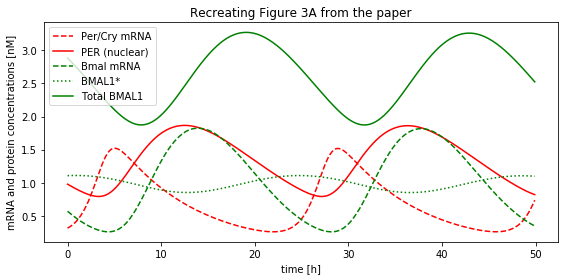

In [1]:
# Start code and write-up here.
#becker weimann model

import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

def bw_oscillator( t, statevars, params ):
    y1 = statevars[0];
    y2 = statevars[1];
    y3 = statevars[2];
    y4 = statevars[3];
    y5 = statevars[4];
    y6 = statevars[5];
    y7 = statevars[6];

    v1b = params[0] # maximal rate of Per2/Cry transcription
    k1b = params[1] # activation threshold for Per2/Cry transcription
    k1i = params[2] # inhibition constant of Per2/Cry transcription
    c = params[3] # concentration of constituative activator
    p = params[4] # Hill coefficient of inhibition of Per2/Cry transcription
    k1d = params[5] # degradation rate of Per2/Cry mRNA
    k2b = params[6] # complex formation rate of Per2/Cry mRNA
    q = params[7] # Number of PER2/CRY complex forming subunits
    k2d = params[8] # degradation rate of cytoplasmic PER2/CRY
    k2t = params[9] # nuclear import rate of teh PER2/CRY complex
    k3t = params[10] # nuclear export rate of teh PER2/CRY complex
    k3d = params[11] # degradation rate of nuclear PER2/CRY
    v4b = params[12] # maximal rate of Bmal1 transcription
    k4b = params[13] # activation threshold for Bmal1 transcription
    r = params[14] # Hill coefficient of activation of Bmal1 transcription
    k4d = params[15] # degradation rate of Bmal1 mRNA
    k5b = params[16] # translation rate of BMAL1
    k5d = params[17] # degradation rate of cytoplasmic BMAL1
    k5t = params[18] # nuclear import rate of BMAL1
    k6t = params[19] # nuclear export rate of BMAL1
    k6d = params[20] # degradation rate of nuclear BMAL1
    k6a = params[21] # activation rate of nuclear BMAL1
    k7a = params[22] # deactivation rate of nuclear BMAL1
    k7d = params[23] # degradataion rate of nuclear BMAL1
        
    dydt = np.zeros( (7,) )
    f1 = v1b * (y7 + c) / (k1b*(1+(y3/k1i)**p) + (y7+c))
    f2 = v4b* y3**r/(k4b**r+y3**r)

    dydt[0] = f1 - k1d*y1
    dydt[1] = k2b*y1**q - k2d*y2 - k2t*y2 + k3t*y3
    dydt[2] = k2t*y2 - k3t*y3 - k3d*y3
    dydt[3] = f2 - k4d* y4
    dydt[4] = k5b*y4 - k5d*y5 - k5t*y5 + k6t*y6
    dydt[5] = k5t*y5 - k6t*y6 - k6d*y6 + k7a*y7 - k6a*y6
    dydt[6] = k6a*y6 - k7a*y7 - k7d*y7

    return dydt

v1b = 9 # maximal rate of Per2/Cry transcription
k1b = 1 # activation threshold for Per2/Cry transcription
k1i = 0.56 # inhibition constant of Per2/Cry transcription
c = 0.01 # concentration of constituative activator
p = 8 # Hill coefficient of inhibition of Per2/Cry transcription
k1d = 0.12 # degradation rate of Per2/Cry mRNA
k2b = 0.3 # complex formation rate of Per2/Cry mRNA
q = 2 # Number of PER2/CRY complex forming subunits
k2d = 0.05 # degradation rate of cytoplasmic PER2/CRY
k2t = 0.24 # nuclear import rate of teh PER2/CRY complex
k3t = 0.02 # nuclear export rate of teh PER2/CRY complex
k3d = 0.12 # degradation rate of nuclear PER2/CRY
v4b = 3.6 # maximal rate of Bmal1 transcription
k4b = 2.16 # activation threshold for Bmal1 transcription
r = 3 # Hill coefficient of activation of Bmal1 transcription
k4d = 0.75 # degradation rate of Bmal1 mRNA
k5b = 0.24 # translation rate of BMAL1
k5d = 0.06 # degradation rate of cytoplasmic BMAL1
k5t = 0.45 # nuclear import rate of BMAL1
k6t = 0.06 # nuclear export rate of BMAL1
k6d = 0.12 # degradation rate of nuclear BMAL1
k6a = 0.09 # activation rate of nuclear BMAL1
k7a = 0.003 # deactivation rate of nuclear BMAL1
k7d = 0.09 # degradataion rate of nuclear BMAL1

params = (v1b,k1b,k1i,c,p,k1d,k2b,q,k2d,k2t,k3t,k3d,v4b,k4b,r,k4d,k5b,k5d,k5t,k6t,k6d,k6a,k7a,k7d)

mf = lambda t,y : bw_oscillator(t,y, params)

sol1 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,200), y0=0.1*np.ones((7,)), 
                                t_eval=np.arange(0,200,.1) )
sol2 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,50), y0=sol1.y[:,-1], 
                                t_eval=np.arange(0,50,.1) )

plt.figure(figsize=(8,4))
#plt.figure()
# plt.subplot( 2, 1, 1)
# plt.plot( sol1.t, sol1.y.T )
# plt.xlabel( "Time (h)")
# plt.legend( ['Per mRNA','PER (cyto)','PER (n)','Bmal mRNA','BMAL1 (cyto)','BMAL1 (n)',"BMAL1*"])
# plt.subplot( 2, 1, 2 )
#first state is per cry mrna sol2.y[0,:]
plt.plot( sol2.t, sol2.y[0, :], "r--")
plt.plot( sol2.t, sol2.y[2, :], "r")
plt.plot( sol2.t, sol2.y[3, :], "g--")
plt.plot( sol2.t, sol2.y[6, :], "g:")
plt.plot( sol2.t, sol2.y[4, :] + sol2.y[5, :] + sol2.y[6, :], "g")
plt.title("Recreating Figure 3A from the paper")
plt.ylabel("mRNA and protein concentrations [nM]")
plt.xlabel("time [h]")
plt.legend( ['Per/Cry mRNA','PER (nuclear)','Bmal mRNA',"BMAL1*", "Total BMAL1"])
# plt.figure()
# plt.plot( sol2.t, sol2.y.T)
# plt.xlabel( "Time (h)")
# plt.legend( ['Per mRNA','PER (cyto)','PER (n)','Bmal mRNA','BMAL1 (cyto)','BMAL1 (n)',"BMAL1*"])

plt.tight_layout()

In [2]:
def runBWModel(solve_ivp_method):
    v1b = 9 # maximal rate of Per2/Cry transcription
    k1b = 1 # activation threshold for Per2/Cry transcription
    k1i = 0.56 # inhibition constant of Per2/Cry transcription
    c = 0.01 # concentration of constituative activator
    p = 8 # Hill coefficient of inhibition of Per2/Cry transcription
    k1d = 0.12 # degradation rate of Per2/Cry mRNA
    k2b = 0.3 # complex formation rate of Per2/Cry mRNA
    q = 2 # Number of PER2/CRY complex forming subunits
    k2d = 0.05 # degradation rate of cytoplasmic PER2/CRY
    k2t = 0.24 # nuclear import rate of teh PER2/CRY complex
    k3t = 0.02 # nuclear export rate of teh PER2/CRY complex
    k3d = 0.12 # degradation rate of nuclear PER2/CRY
    v4b = 3.6 # maximal rate of Bmal1 transcription
    k4b = 2.16 # activation threshold for Bmal1 transcription
    r = 3 # Hill coefficient of activation of Bmal1 transcription
    k4d = 0.75 # degradation rate of Bmal1 mRNA
    k5b = 0.24 # translation rate of BMAL1
    k5d = 0.06 # degradation rate of cytoplasmic BMAL1
    k5t = 0.45 # nuclear import rate of BMAL1
    k6t = 0.06 # nuclear export rate of BMAL1
    k6d = 0.12 # degradation rate of nuclear BMAL1
    k6a = 0.09 # activation rate of nuclear BMAL1
    k7a = 0.003 # deactivation rate of nuclear BMAL1
    k7d = 0.09 # degradataion rate of nuclear BMAL1

    params = (v1b,k1b,k1i,c,p,k1d,k2b,q,k2d,k2t,k3t,k3d,v4b,k4b,r,k4d,k5b,k5d,k5t,k6t,k6d,k6a,k7a,k7d)

    mf = lambda t,y : bw_oscillator(t,y, params)

    sol1 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,200), y0=0.1*np.ones((7,)), method=solve_ivp_method, rtol=1e-8 )
    sol2 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=sol1.y[:,-1], method=solve_ivp_method, rtol=1e-8)
    return sol2

## Runtimes for RK23, RK45, DOP853, Radau, BDF, and LSODA

In [3]:
%%timeit
#using RK23
sol = runBWModel("RK23")

1.94 s ± 19.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%timeit
#using RK45
sol = runBWModel("RK45")

632 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%%timeit
#using DOP853
sol = runBWModel("DOP853")

520 ms ± 7.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%%timeit
#using Radau
sol = runBWModel("Radau")

4.48 s ± 12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
#using BDF
sol = runBWModel("BDF")

2.84 s ± 23.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit
#using LSODA
sol = runBWModel("LSODA")

392 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


RK23 takes ~2.14 s; RK23 is a low-order explicit solver

RK45 takes ~700 ms; RK45 is a high-order explicit solver

DOP853 takes ~570 ms; DOP853 is an even higher order explicit solver

Radau takes ~4.68 s; Radau is a high-order implicit solver

BDF takes ~2.98 s; BDF is a variable-order implicit solver

LSODA takes ~430 ms; LSODA is an all-purpose solver

Do these times make sense?

Their standard deviations are less than 100ms away, so I think the average times can be relatively accurate for runtime.

As we go up in order, the time it takes goes down for the explicit solvers, which makes sense, but as we move to the implicit solvers, they take extra computation and are harder to implement. This therefore makes sense, as well so that the implicit solver takes longer than the explicit solvers, and variable order would mean that it would try to find the best. LSODA taking the least amount of time total adjusts its time steps, so it has the least to do, and is all-purpose, so it adapts to the ode to be the best solving method, like we did in a previous project with adaptive-time-step forward euler.

## Looking at sol.t.size

In [9]:
solRK23 = runBWModel("RK23")
solRK45 = runBWModel("RK45")
solDOP853 = runBWModel("DOP853")
solRadau = runBWModel("Radau")
solBDF = runBWModel("BDF")
solLSODA = runBWModel("LSODA")

solList = [solRK23, solRK45, solDOP853, solRadau, solBDF, solLSODA]
solNames = ["solRK23", "solRK45", "solDOP853", "solRadau", "solBDF", "solLSODA"]
for i in range(len(solList)):
    print(solNames[i], "size :", solList[i].t.size)

solRK23 size : 18260
solRK45 size : 3398
solDOP853 size : 1279
solRadau size : 7896
solBDF size : 10540
solLSODA size : 8511


Do they correspond to the times?

They mostly do starting with the explicit, the RK23 is lowest order, so it has more time steps, and DOP has the least time steps, but as we move to the implicit methods, Radau takes longer with less time steps and BDF takes less time with more time steps. The biggest surprise is LSODA, which is adaptive, and takes one of the highest amount of time steps, but is the quickest solver.

## Sensitivity analysis of all the params


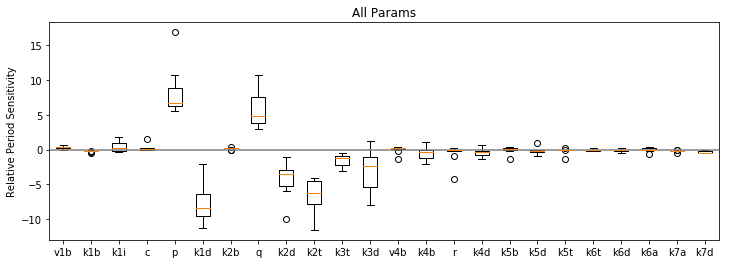

In [30]:
import scipy.signal
def get_period(t,x):
    """ Approximate the period of a 1-D x, given the time-steps t.
        Returns a tuple with the period and the standard deviation of the period over time.
        if the value of the standard deviation is not smaller than 0.1, then
        it means the period estimate is dodgy and you shouldn't use it. Instead,
        plot your simulation and figure out why it isn't periodic - maybe it just
        hasn't reached the limit cycle yet."""
    idxs = scipy.signal.find_peaks(x)
    #print("idxs", idxs)
    idxs = idxs[0]
    times = t[idxs]
    period = np.mean(np.diff(times));
    sdperiod = np.sqrt(np.var(np.diff(times)));
    return (period,sdperiod)

def sensitivity( fcn, ref_params, frac_change ):
    """
    fcn should be a handle to a function that takes a parameter set as input
        and returns a scalar as output.
    ref_params should be a 1D ndarray with the parameter set
    frac_change is the perturbation size, as a scale (i.e. the fraction by which you want to adjust the parameter by)
    """
    ref = fcn( ref_params );
    Srel = np.zeros((ref_params.size,));
    for i in range(ref_params.size):
        params = ref_params.copy();
        params[i] = (1+frac_change)*ref_params[i];
        output = fcn( params );
        Srel[i] = (output-ref)/frac_change;
    return Srel

def simulate_bw( params, t0=0, tStop=240, dt=0.1 ):
    yinit = np.ones((7,));
    sol = scipy.integrate.solve_ivp(fun=bw_oscillator, t_span=(0,10*24), y0=yinit, method='RK45', 
                                    t_eval=np.arange(0,10*24,0.1), args=[params] )
    sol = scipy.integrate.solve_ivp(fun=bw_oscillator, t_span=(0,10*24), y0=sol.y[:,-1], method='RK45', 
                                    t_eval=np.arange(t0,tStop,dt), args=[params], rtol=1e-8 )

    return sol

def bw_period( params ):
    sol = simulate_bw( params )
    (per,sdper) = get_period( sol.t, sol.y[0,:] )
    return per

def bw_amplitude( params, which_state=-1 ):
    """ Return the amplitude of the given state or of the sum of all three states
        If which_state  == -1, then return the sum of all 7.
        If which_state == -2, then return amplitude of total Bmal1
        Otherwise, which_state should be the index of the state
    """
    sol = simulate_bw( params )
    if which_state == -1:
        return np.sum(sol.y.max(axis=1)-sol.y.min(axis=1))
    elif which_state == -2:
        bmal1 = np.sum(sol.y[[4,5,6],:],axis=0)
        return bmal1.max() - bmal1.min()
    else:
        return sol.y[which_state,:].max() - sol.y[which_state,:].min()

def plot_boxes(sens,which_param_names,ylab,title):
    """ 
    Make a box plot of the sensitivities for just the given parameters.
    Use the given ylabel and title.
    sens is M x NP where NP is the number of parameters.
    which_param_names is a list of parameter names. 
    """
    plt.figure( figsize=(min(12,len(which_param_names)/2),4) )
    idxs = get_indices_from_names(which_param_names)
    plt.boxplot( sens[:,idxs] );
    plt.axhline(color='gray')
    plt.xticks( ticks=np.arange(1,len(which_param_names)+1), labels=which_param_names);
    plt.ylabel( ylab )
    plt.title( title )


good_params = np.array([[1.078430e+01, 8.766497e-01, 1.080096e+00, 7.568730e-02, 
          1.200000e+01, 1.616935e-01, 1.460183e+00, 2.000000e+00, 
          9.283799e-02, 1.299121e-01, 5.998953e-02, 1.535481e-01, 
          3.879198e+00, 7.173526e-01, 2.222806e+00, 9.921052e-01, 
          4.644679e-01, 3.425502e-01, 8.802416e-01, 3.806002e-01, 
          8.190066e-01, 1.691442e-01, 2.017845e-01, 6.049184e-02],
          [1.105305e+01, 8.869825e-01, 1.186796e+00, 9.249658e-02, 
          1.167389e+01, 9.527771e-02, 1.596353e+00, 2.000000e+00, 
          2.053693e-01, 2.421063e-01, 9.319930e-02, 4.245378e-02, 
          1.749306e+00, 2.097235e+00, 2.327159e+00, 5.458188e-02, 
          6.066717e-01, 2.408465e-01, 9.779471e-01, 6.058098e-01, 
          7.003232e-01, 2.082604e-01, 2.139649e-01, 1.422219e-01],
          [7.694979e+00, 9.725064e-01, 1.627668e+00, 3.869009e-02, 
          1.200000e+01, 1.616368e-01, 1.674707e+00, 2.000000e+00, 
          4.444607e-02, 2.697890e-01, 3.133686e-02, 4.178307e-02, 
          2.767062e+00, 1.457110e+00, 4.497883e+00, 4.451871e-01, 
          8.925844e-01, 3.079141e-01, 4.004329e-01, 7.317836e-01, 
          6.546734e-02, 1.000000e+00, 6.266421e-02, 2.714157e-01],
          [1.072000e+01, 8.521561e-01, 5.899309e-01, 2.895122e-02, 
          1.059883e+01, 1.928074e-01, 9.696923e-01, 2.000000e+00, 
          1.567634e-01, 1.136026e-01, 6.398787e-02, 7.860559e-02, 
          2.974245e+00, 5.251202e-01, 3.119112e+00, 4.906301e-01, 
          3.604674e-01, 4.385489e-02, 7.883187e-02, 6.425336e-01, 
          8.284397e-01, 2.927542e-01, 1.433195e-01, 5.617510e-02],
          [1.232326e+01, 9.103176e-01, 4.834688e-01, 8.352094e-02, 
          9.455983e+00, 1.579788e-01, 8.363802e-01, 2.000000e+00, 
          3.577802e-02, 1.218272e-01, 2.635282e-02, 2.118825e-01, 
          4.456207e+00, 9.481368e-01, 3.792744e+00, 1.462117e-01, 
          4.249968e-01, 9.708511e-01, 5.208935e-01, 4.322338e-02, 
          2.991346e-01, 9.093128e-01, 3.592767e-01, 7.756379e-01],
          [1.349096e+01, 1.127871e+00, 2.702570e-01, 6.120856e-02, 
          9.067083e+00, 8.052872e-02, 1.713320e+00, 2.000000e+00, 
          2.694864e-01, 1.338259e-01, 1.049769e-02, 7.475697e-02, 
          3.540344e+00, 5.978256e-01, 4.123043e+00, 8.920540e-02, 
          1.158880e-01, 3.026264e-01, 1.012244e-01, 5.871539e-01, 
          6.075644e-01, 6.275891e-01, 3.815530e-01, 2.613496e-01],
          [1.323489e+01, 6.258026e-01, 1.078310e+00, 8.150330e-02, 
          1.110932e+01, 7.757724e-02, 1.122008e+00, 2.000000e+00, 
          1.163093e-01, 1.805502e-01, 7.637243e-02, 7.839790e-02, 
          4.293422e+00, 2.744814e+00, 3.700187e+00, 7.566274e-01, 
          9.983528e-01, 8.929401e-01, 1.771505e-01, 5.285087e-01, 
          1.000000e+00, 8.648079e-01, 3.210598e-01, 1.528852e-01],
          [1.048237e+01, 5.422042e-01, 3.817022e-01, 6.161087e-02, 
          8.385059e+00, 1.864153e-01, 5.876520e-02, 2.000000e+00, 
          8.642844e-02, 1.688047e-01, 2.832069e-02, 5.396891e-02, 
          2.825848e+00, 5.717247e-01, 2.807118e+00, 2.442573e-01, 
          1.315198e-01, 4.824171e-01, 5.342195e-01, 5.181199e-01, 
          1.312228e-01, 9.580619e-01, 3.752851e-01, 1.316351e-01],
          [1.151471e+01, 1.931490e+00, 1.275262e+00, 2.951683e-02, 
          1.085430e+01, 1.783071e-01, 4.459811e-01, 2.000000e+00, 
          8.417466e-02, 1.995254e-01, 1.928558e-02, 1.056796e-01, 
          4.180298e+00, 5.000000e-01, 2.496343e+00, 7.750371e-01, 
          8.921799e-01, 5.951246e-01, 5.185538e-01, 2.880820e-01, 
          7.065108e-01, 6.719107e-01, 4.805219e-01, 3.172662e-01],
          [7.396488e+00, 1.253746e+00, 1.280066e+00, 2.797474e-02, 
          1.013265e+01, 1.598121e-01, 1.333844e+00, 2.000000e+00, 
          8.155630e-02, 1.638651e-01, 3.032052e-02, 1.636961e-01, 
          3.824177e+00, 5.647208e-01, 3.252333e+00, 3.944877e-01, 
          5.376554e-01, 3.143310e-01, 9.333084e-01, 7.893691e-01, 
          5.304268e-01, 5.238169e-01, 4.597239e-01, 2.754746e-01]])

pub_params = np.array((v1b,k1b,k1i,c,p,k1d,k2b,q,k2d,k2t,k3t,k3d,v4b,k4b,r,k4d,k5b,k5d,k5t,k6t,k6d,k6a,k7a,k7d))

param_names = ['v1b','k1b','k1i','c','p','k1d','k2b','q','k2d','k2t','k3t','k3d','v4b',
               'k4b','r','k4d','k5b','k5d','k5t','k6t','k6d','k6a','k7a','k7d']

pdict = {}
for i in range(len(param_names)):
    pdict[param_names[i]] = i
    
def get_indices_from_names(which_param_names):
    """ Given a list of names, use pdict to return a list of their indices.
    """
    idxs = []
    for pn in which_param_names:
        idxs.append(pdict[pn])

    return idxs

num_params = good_params.shape[1]
num_runs = good_params.shape[0]

fn = 'bw_sensitivity.npz'

if not os.path.isfile( fn ):
    pRel = np.zeros((num_runs,num_params))
    aY1Rel = np.zeros((num_runs,num_params))
    aY2Rel = np.zeros((num_runs,num_params))
    aY3Rel = np.zeros((num_runs,num_params))
    aY4Rel = np.zeros((num_runs,num_params))
    aY5Rel = np.zeros((num_runs,num_params))
    aY6Rel = np.zeros((num_runs,num_params))
    aY7Rel = np.zeros((num_runs,num_params))
    aBRel = np.zeros((num_runs,num_params))


    for run_num in range(num_runs):
        pRel[run_num,:] = sensitivity( bw_period, np.array(good_params[run_num,:]), 0.05 )
        aY1Rel[run_num,:] = sensitivity( lambda p: bw_amplitude( p, which_state = 0), good_params[run_num,:], 0.05 )
        aY2Rel[run_num,:] = sensitivity( lambda p: bw_amplitude( p, which_state = 1), good_params[run_num,:], 0.05 )
        aY3Rel[run_num,:] = sensitivity( lambda p: bw_amplitude( p, which_state = 2), good_params[run_num,:], 0.05 )
        aY4Rel[run_num,:] = sensitivity( lambda p: bw_amplitude( p, which_state = 3), good_params[run_num,:], 0.05 )
        aY5Rel[run_num,:] = sensitivity( lambda p: bw_amplitude( p, which_state = 4), good_params[run_num,:], 0.05 )
        aY6Rel[run_num,:] = sensitivity( lambda p: bw_amplitude( p, which_state = 5), good_params[run_num,:], 0.05 )
        aY7Rel[run_num,:] = sensitivity( lambda p: bw_amplitude( p, which_state = 6), good_params[run_num,:], 0.05 )
        aBRel[run_num,:] = sensitivity( lambda p: bw_amplitude( p, which_state = -2), good_params[run_num,:], 0.05 )


    np.savez( fn, pRel=pRel, aY1Rel=aY1Rel, aY2Rel=aY2Rel, aY3Rel=aY3Rel, aY4Rel=aY4Rel, 
             aY5Rel=aY5Rel, aY6Rel=aY6Rel, aY7Rel=aY7Rel, aBRel=aBRel )

else:
    f = np.load( fn )
    pRel = f['pRel']
    aY1Rel = f['aY1Rel']
    aY2Rel = f['aY2Rel']
    aY3Rel = f['aY3Rel']
    aY4Rel = f['aY4Rel']
    aY5Rel = f['aY5Rel']
    aY6Rel = f['aY6Rel']
    aY7Rel = f['aY7Rel']
    aBRel = f['aBRel']

plot_boxes( pRel, param_names, 'Relative Period Sensitivity', 'All Params')


## Reproduce figures from Becker-Weimann et al (2004). Be sure to include a discussion of your approach and the meaning of the figure.

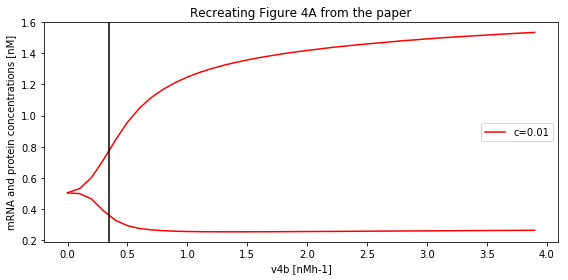

In [63]:
v1b = 9 # maximal rate of Per2/Cry transcription
k1b = 1 # activation threshold for Per2/Cry transcription
k1i = 0.56 # inhibition constant of Per2/Cry transcription
c = 0.01 # concentration of constituative activator
p = 8 # Hill coefficient of inhibition of Per2/Cry transcription
k1d = 0.12 # degradation rate of Per2/Cry mRNA
k2b = 0.3 # complex formation rate of Per2/Cry mRNA
q = 2 # Number of PER2/CRY complex forming subunits
k2d = 0.05 # degradation rate of cytoplasmic PER2/CRY
k2t = 0.24 # nuclear import rate of teh PER2/CRY complex
k3t = 0.02 # nuclear export rate of teh PER2/CRY complex
k3d = 0.12 # degradation rate of nuclear PER2/CRY
v4b = 3.6 # maximal rate of Bmal1 transcription
k4b = 2.16 # activation threshold for Bmal1 transcription
r = 3 # Hill coefficient of activation of Bmal1 transcription
k4d = 0.75 # degradation rate of Bmal1 mRNA
k5b = 0.24 # translation rate of BMAL1
k5d = 0.06 # degradation rate of cytoplasmic BMAL1
k5t = 0.45 # nuclear import rate of BMAL1
k6t = 0.06 # nuclear export rate of BMAL1
k6d = 0.12 # degradation rate of nuclear BMAL1
k6a = 0.09 # activation rate of nuclear BMAL1
k7a = 0.003 # deactivation rate of nuclear BMAL1
k7d = 0.09 # degradataion rate of nuclear BMAL1
#vary v4b ( the variable, 1 to 4)
v4bs = np.arange(0,4, 0.1)
maxsol2 = []
for v4b in v4bs:

    params = (v1b,k1b,k1i,c,p,k1d,k2b,q,k2d,k2t,k3t,k3d,v4b,k4b,r,k4d,k5b,k5d,k5t,k6t,k6d,k6a,k7a,k7d)

    mf = lambda t,y : bw_oscillator(t,y, params)

    sol1 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,200), y0=0.1*np.ones((7,)), 
                                    t_eval=np.arange(0,200,.1) )
    sol2 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,50), y0=sol1.y[:,-1], 
                                    t_eval=np.arange(0,50,0.1) )
    maxsol2.append((np.min(sol2.y[0,:]),np.max(sol2.y[0,:])))
plt.figure(figsize=(8,4))
#plt.figure()
# plt.subplot( 2, 1, 1)
# plt.plot( sol1.t, sol1.y.T )
# plt.xlabel( "Time (h)")
# plt.legend( ['Per mRNA','PER (cyto)','PER (n)','Bmal mRNA','BMAL1 (cyto)','BMAL1 (n)',"BMAL1*"])
# plt.subplot( 2, 1, 2 )
plt.plot( v4bs, np.asarray(maxsol2), "r")
plt.axvline(0.35, color = 'black')

plt.title("Recreating Figure 4A from the paper")
plt.ylabel("mRNA and protein concentrations [nM]")
plt.xlabel("v4b [nMh-1]")
plt.legend(['c=0.01'])
#plt.legend( ['Per/Cry mRNA','PER (nuclear)','Bmal mRNA',"BMAL1*", "Total BMAL1"])
# plt.figure()
# plt.plot( sol2.t, sol2.y.T)
# plt.xlabel( "Time (h)")
# plt.legend( ['Per mRNA','PER (cyto)','PER (n)','Bmal mRNA','BMAL1 (cyto)','BMAL1 n)',"BMAL1*"])

plt.tight_layout()

## Extension: Figure 4A

The approach to making this graph was to grab the minimum and maximum of the first state (which was per/cry mRNA). This first state is also used in the next 3 graphs, because I will be recreating 4A-D. The v4b here is changed from 0 to 4 with increment 0.01 using np.arange to get a nice range of values from 0 to 4 for the x axis. Then I just plot those v4b values vs the min and max and I get the oscillating lines.

So what the graph shows is the minimum and maximum values for the oscillation. I couldn't really figure out how to get the dashed line, which was the unstable steady state. The vertical line shows when the Hopf bifurcation, where the oscillations have a min and a max that is different and splits.

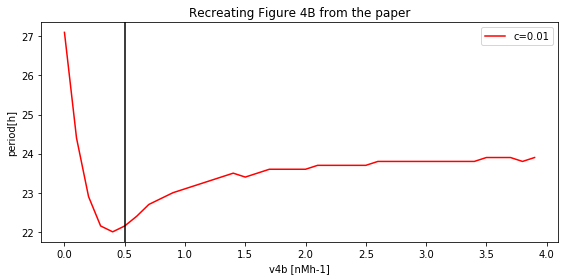

In [60]:
v1b = 9 # maximal rate of Per2/Cry transcription
k1b = 1 # activation threshold for Per2/Cry transcription
k1i = 0.56 # inhibition constant of Per2/Cry transcription
c = 0.01 # concentration of constituative activator
p = 8 # Hill coefficient of inhibition of Per2/Cry transcription
k1d = 0.12 # degradation rate of Per2/Cry mRNA
k2b = 0.3 # complex formation rate of Per2/Cry mRNA
q = 2 # Number of PER2/CRY complex forming subunits
k2d = 0.05 # degradation rate of cytoplasmic PER2/CRY
k2t = 0.24 # nuclear import rate of teh PER2/CRY complex
k3t = 0.02 # nuclear export rate of teh PER2/CRY complex
k3d = 0.12 # degradation rate of nuclear PER2/CRY
v4b = 3.6 # maximal rate of Bmal1 transcription
k4b = 2.16 # activation threshold for Bmal1 transcription
r = 3 # Hill coefficient of activation of Bmal1 transcription
k4d = 0.75 # degradation rate of Bmal1 mRNA
k5b = 0.24 # translation rate of BMAL1
k5d = 0.06 # degradation rate of cytoplasmic BMAL1
k5t = 0.45 # nuclear import rate of BMAL1
k6t = 0.06 # nuclear export rate of BMAL1
k6d = 0.12 # degradation rate of nuclear BMAL1
k6a = 0.09 # activation rate of nuclear BMAL1
k7a = 0.003 # deactivation rate of nuclear BMAL1
k7d = 0.09 # degradataion rate of nuclear BMAL1
#vary v4b ( the variable, 1 to 4)
v4bs = np.arange(0,4, 0.1)
maxsol2 = []
for v4b in v4bs:

    params = (v1b,k1b,k1i,c,p,k1d,k2b,q,k2d,k2t,k3t,k3d,v4b,k4b,r,k4d,k5b,k5d,k5t,k6t,k6d,k6a,k7a,k7d)

    mf = lambda t,y : bw_oscillator(t,y, params)

    sol1 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,200), y0=0.1*np.ones((7,)), 
                                    t_eval=np.arange(0,200,.1) )
    sol2 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,50), y0=sol1.y[:,-1], 
                                    t_eval=np.arange(0,50,0.1) )
    maxsol2.append(get_period(sol2.t, sol2.y[0,:])[0])
plt.figure(figsize=(8,4))
#plt.figure()
# plt.subplot( 2, 1, 1)
# plt.plot( sol1.t, sol1.y.T )
# plt.xlabel( "Time (h)")
# plt.legend( ['Per mRNA','PER (cyto)','PER (n)','Bmal mRNA','BMAL1 (cyto)','BMAL1 (n)',"BMAL1*"])
# plt.subplot( 2, 1, 2 )
plt.plot( v4bs, np.asarray(maxsol2), "r")
plt.axvline(0.5, color='black')

plt.title("Recreating Figure 4B from the paper")
plt.ylabel("period[h]")
plt.xlabel("v4b [nMh-1]")
plt.legend(['c=0.01'])
#plt.legend( ['Per/Cry mRNA','PER (nuclear)','Bmal mRNA',"BMAL1*", "Total BMAL1"])
# plt.figure()
# plt.plot( sol2.t, sol2.y.T)
# plt.xlabel( "Time (h)")
# plt.legend( ['Per mRNA','PER (cyto)','PER (n)','Bmal mRNA','BMAL1 (cyto)','BMAL1 n)',"BMAL1*"])

plt.tight_layout()

## Extension: Figure 4B

This graph is somewhat similar because we use v4b, but now we are looking at the period of the first state instead of the nM value of the min and max of the first state. The period starting at around 0.5, like in the paper, starts around period 22 and moves up to right below 24. The vertical black line shows when around the paper's line starts.

This graph shows that we get closer to the 24 hour cycle, as we move through to v4b being 4. This makes sense because the default value for v4b is 3.6.

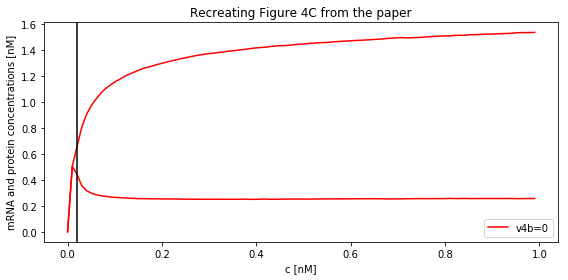

In [64]:
v1b = 9 # maximal rate of Per2/Cry transcription
k1b = 1 # activation threshold for Per2/Cry transcription
k1i = 0.56 # inhibition constant of Per2/Cry transcription
c = 0.01 # concentration of constituative activator
p = 8 # Hill coefficient of inhibition of Per2/Cry transcription
k1d = 0.12 # degradation rate of Per2/Cry mRNA
k2b = 0.3 # complex formation rate of Per2/Cry mRNA
q = 2 # Number of PER2/CRY complex forming subunits
k2d = 0.05 # degradation rate of cytoplasmic PER2/CRY
k2t = 0.24 # nuclear import rate of teh PER2/CRY complex
k3t = 0.02 # nuclear export rate of teh PER2/CRY complex
k3d = 0.12 # degradation rate of nuclear PER2/CRY
v4b = 3.6 # maximal rate of Bmal1 transcription
v4b = 0
k4b = 2.16 # activation threshold for Bmal1 transcription
r = 3 # Hill coefficient of activation of Bmal1 transcription
k4d = 0.75 # degradation rate of Bmal1 mRNA
k5b = 0.24 # translation rate of BMAL1
k5d = 0.06 # degradation rate of cytoplasmic BMAL1
k5t = 0.45 # nuclear import rate of BMAL1
k6t = 0.06 # nuclear export rate of BMAL1
k6d = 0.12 # degradation rate of nuclear BMAL1
k6a = 0.09 # activation rate of nuclear BMAL1
k7a = 0.003 # deactivation rate of nuclear BMAL1
k7d = 0.09 # degradataion rate of nuclear BMAL1
#vary v4b ( the variable, 1 to 4)
cs = np.arange(0,1, 0.01)
maxsol2 = []
for c in cs:

    params = (v1b,k1b,k1i,c,p,k1d,k2b,q,k2d,k2t,k3t,k3d,v4b,k4b,r,k4d,k5b,k5d,k5t,k6t,k6d,k6a,k7a,k7d)

    mf = lambda t,y : bw_oscillator(t,y, params)

    sol1 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,200), y0=0.1*np.ones((7,)), 
                                    t_eval=np.arange(0,200,.1) )
    sol2 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,50), y0=sol1.y[:,-1], 
                                    t_eval=np.arange(0,50,0.1) )
    maxsol2.append((np.min(sol2.y[0,:]),np.max(sol2.y[0,:])))
plt.figure(figsize=(8,4))
#plt.figure()
# plt.subplot( 2, 1, 1)
# plt.plot( sol1.t, sol1.y.T )
# plt.xlabel( "Time (h)")
# plt.legend( ['Per mRNA','PER (cyto)','PER (n)','Bmal mRNA','BMAL1 (cyto)','BMAL1 (n)',"BMAL1*"])
# plt.subplot( 2, 1, 2 )
plt.plot( cs, np.asarray(maxsol2), "r")
plt.axvline(0.02, color = 'black')

plt.title("Recreating Figure 4C from the paper")
plt.ylabel("mRNA and protein concentrations [nM]")
plt.xlabel("c [nM]")
plt.legend(['v4b=0'])
#plt.legend( ['Per/Cry mRNA','PER (nuclear)','Bmal mRNA',"BMAL1*", "Total BMAL1"])
# plt.figure()
# plt.plot( sol2.t, sol2.y.T)
# plt.xlabel( "Time (h)")
# plt.legend( ['Per mRNA','PER (cyto)','PER (n)','Bmal mRNA','BMAL1 (cyto)','BMAL1 n)',"BMAL1*"])

plt.tight_layout()

## Extension: Figure 4C

This figure looks at the c values, so I use np.arange here for values 0 to 1 with interval 0.01. For this one, we don't keep the other variable (v4b) at its original, but we actually make it 0.

This graph shows the minimum and maximum values of the oscillation again, and I did not get the dashed line because I did not know how to get the unstable steady state. The vertical line shows when the Hopf bifurcation, where the oscillations have a min and a max that is different and splits.



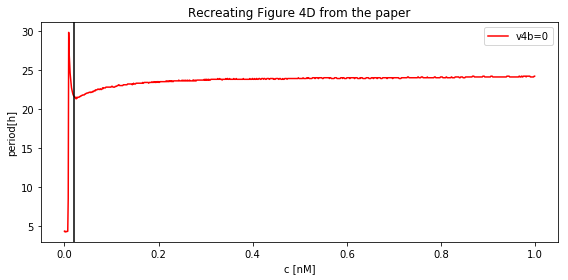

In [65]:
v1b = 9 # maximal rate of Per2/Cry transcription
k1b = 1 # activation threshold for Per2/Cry transcription
k1i = 0.56 # inhibition constant of Per2/Cry transcription
c = 0.01 # concentration of constituative activator
p = 8 # Hill coefficient of inhibition of Per2/Cry transcription
k1d = 0.12 # degradation rate of Per2/Cry mRNA
k2b = 0.3 # complex formation rate of Per2/Cry mRNA
q = 2 # Number of PER2/CRY complex forming subunits
k2d = 0.05 # degradation rate of cytoplasmic PER2/CRY
k2t = 0.24 # nuclear import rate of teh PER2/CRY complex
k3t = 0.02 # nuclear export rate of teh PER2/CRY complex
k3d = 0.12 # degradation rate of nuclear PER2/CRY
v4b = 3.6 # maximal rate of Bmal1 transcription
v4b = 0
k4b = 2.16 # activation threshold for Bmal1 transcription
r = 3 # Hill coefficient of activation of Bmal1 transcription
k4d = 0.75 # degradation rate of Bmal1 mRNA
k5b = 0.24 # translation rate of BMAL1
k5d = 0.06 # degradation rate of cytoplasmic BMAL1
k5t = 0.45 # nuclear import rate of BMAL1
k6t = 0.06 # nuclear export rate of BMAL1
k6d = 0.12 # degradation rate of nuclear BMAL1
k6a = 0.09 # activation rate of nuclear BMAL1
k7a = 0.003 # deactivation rate of nuclear BMAL1
k7d = 0.09 # degradataion rate of nuclear BMAL1
#vary v4b ( the variable, 1 to 4)
cs = np.arange(0,1, 0.001)
maxsol2 = []
for c in cs:

    params = (v1b,k1b,k1i,c,p,k1d,k2b,q,k2d,k2t,k3t,k3d,v4b,k4b,r,k4d,k5b,k5d,k5t,k6t,k6d,k6a,k7a,k7d)

    mf = lambda t,y : bw_oscillator(t,y, params)

    sol1 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,200), y0=0.1*np.ones((7,)), 
                                    t_eval=np.arange(0,200,.1) )
    sol2 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,50), y0=sol1.y[:,-1], 
                                    t_eval=np.arange(0,50,0.1) )
    #print(get_period(sol2.t, sol2.y))
    maxsol2.append(get_period(sol2.t, sol2.y[0,:])[0])
plt.figure(figsize=(8,4))
#plt.figure()
# plt.subplot( 2, 1, 1)
# plt.plot( sol1.t, sol1.y.T )
# plt.xlabel( "Time (h)")
# plt.legend( ['Per mRNA','PER (cyto)','PER (n)','Bmal mRNA','BMAL1 (cyto)','BMAL1 (n)',"BMAL1*"])
# plt.subplot( 2, 1, 2 )
plt.plot( cs, np.asarray(maxsol2), "r")
plt.axvline(0.02, color = 'black')

plt.title("Recreating Figure 4D from the paper")
plt.ylabel("period[h]")
plt.xlabel("c [nM]")
plt.legend(['v4b=0'])
#plt.legend( ['Per/Cry mRNA','PER (nuclear)','Bmal mRNA',"BMAL1*", "Total BMAL1"])
# plt.figure()
# plt.plot( sol2.t, sol2.y.T)
# plt.xlabel( "Time (h)")
# plt.legend( ['Per mRNA','PER (cyto)','PER (n)','Bmal mRNA','BMAL1 (cyto)','BMAL1 n)',"BMAL1*"])

plt.tight_layout()

## Extension: Figure 4D

This graph uses the same concept from 4C and we take the values from 0 to 1 with interval 0.001 so we dont get too many spikes. The period goes from a little below 22 to around 24 again, where we steady state the 24 hour cycle, which makes sense. The black vertical line shows where the paper's line starts.

This graph shows that as we move up in c, we get nearer to the 24 hour cycle.

<hr style="border:2px solid gray"> </hr>

Acknowledgements

*Replace this text with links to external resources and thanks to people you worked with.*